In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [48]:
import cv2 as cv
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_openml  # veri kümesi için kullanılır
from skimage.filters import threshold_otsu


from sklearn.tree import DecisionTreeClassifier # karar ağacı sınıflandırma modeli
from sklearn.ensemble import RandomForestClassifier # rastgele orman sınıflandırma modeli

from sklearn.metrics import accuracy_score # başarım ölçütü
from sklearn.metrics import f1_score # başarım ölçütü

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay # confusion matrix hesaplama ve gösterimi

import numpy as np

In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
data_dir = "/content/gdrive/MyDrive/faces"

In [51]:
import os
for dirname, _, filenames in os.walk('C:/Users/Abid Ali/Desktop/corvit/faces/Training'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [52]:
location = "/content/gdrive/MyDrive/faces/Training/"
location_2 = "/content/gdrive/MyDrive/faces/Validation/"
training_data = []
validation_data = []
gender = ["male" , "female"]

In [53]:
data_limit_per_folder = 1200  # Set the maximum number of data points to read per folder
training_data = []
for x in gender:
    num_gender = gender.index(x)
    data_count = 0  # Initialize a counter for the data points read

    for i in os.listdir(location + x):
        if data_count >= data_limit_per_folder:
            break  # Exit the loop if we have reached the data limit per folder

        data = cv.imread(os.path.join(location, x, i))
        data_1 = cv.cvtColor(data, cv.COLOR_BGR2GRAY)
        data_2 = cv.resize(data_1, (50, 50))

        training_data.append([data_2, num_gender])
        data_count += 1  # Increment the data counter
# Now, your training_data list contains 2400 data points (1200 from each folder)

In [54]:
import numpy as np

# Assuming 'data' is your list of image data and labels
scaled_data = []

for image, label in training_data:
    # Convert the image data to a floating-point format
    image_float = image.astype(np.float32)

    # Calculate the mean and standard deviation of the image data
    mean_value = np.mean(image_float)
    std_deviation = np.std(image_float)

    # Perform standard scaling
    standard_scaled_image = (image_float - mean_value) / std_deviation

    # Append the scaled image and label to the scaled_data list
    scaled_data.append([standard_scaled_image, label])

# 'scaled_data' now contains the scaled image data


In [55]:
main_data = pd.DataFrame(scaled_data)
main_data['Gender'] = main_data[1]
main_data['Images'] = main_data[0]
del main_data[0]
del main_data[1]

In [56]:
main_data

,Gender,Images
0,0,"[[0.3967832, 0.8968407, 0.92809427, 0.9593479,..."
1,0,"[[-0.939868, -1.4091626, -1.1745152, -0.675889..."
2,0,"[[-1.43408, -1.6967514, -2.090758, -1.3355783,..."
3,0,"[[-1.3832179, -1.5231099, -1.4671531, -1.38321..."
4,0,"[[-1.9289658, -1.5374365, -1.0676013, -1.45913..."
...,...,...
2395,1,"[[-1.7429744, -1.6812456, -1.7018218, -1.80470..."
2396,1,"[[0.13635764, -0.0565803, -0.11170542, -0.2770..."
2397,1,"[[-1.2714877, -1.1693372, -1.135287, -1.271487..."
2398,1,"[[-1.6144944, -1.6375988, -1.6838071, -1.70691..."


In [57]:
X_clean = []
for image in main_data["Images"] :
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value
    X_clean.append(binary_image.flatten())

In [58]:
x_train , x_test , y_train , y_test = train_test_split(X_clean , main_data["Gender"] , test_size=0.2 , random_state=42)

In [59]:
import sklearn.metrics as sm
from sklearn.utils import all_estimators
estimators = all_estimators(type_filter='classifier')
model_name=[]
model_precision=[]
for name, get_model in estimators:
    try:
        model = get_model()
        model.fit(x_train,y_train)
        pred_y=model.predict(x_test)
        #sm.precision_score(test_y, pred_y)
        model_precision.append(sm.precision_score(y_test, pred_y))
        model_name.append(name)
    except Exception as e:
        print('Unable to import', name)
        print(e)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Unable to import ClassifierChain
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Conve

Unable to import MultiOutputClassifier
MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OneVsOneClassifier
OneVsOneClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OneVsRestClassifier
OneVsRestClassifier.__init__() missing 1 required positional argument: 'estimator'
Unable to import OutputCodeClassifier
OutputCodeClassifier.__init__() missing 1 required positional argument: 'estimator'


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Unable to import RadiusNeighborsClassifier
No neighbors found for test samples array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 

In [60]:
results=pd.DataFrame({"Model Name":model_name , "Model precision":model_precision})
results

,Model Name,Model precision
0,AdaBoostClassifier,0.776316
1,BaggingClassifier,0.788945
2,BernoulliNB,0.634146
3,CalibratedClassifierCV,0.755556
4,CategoricalNB,0.634146
5,ComplementNB,0.670782
6,DecisionTreeClassifier,0.627049
7,DummyClassifier,0.483333
8,ExtraTreeClassifier,0.602410
9,ExtraTreesClassifier,0.802691


In [61]:
from sklearn.svm import SVC

# Create an SVC model
model = SVC()

# model training
model.fit(x_train , y_train)

# prediction from test data set
y_pred = model.predict(x_test)


In [62]:
f1_score = f1_score(y_test , y_pred , average="weighted")
print("f1 score: " , f1_score)

f1 score:  0.8498746867167919


In [63]:
accuracy = accuracy_score(y_test , y_pred)
print("accuracy: " , accuracy)

accuracy:  0.85


In [64]:
precision=sm.precision_score(y_test, y_pred)
print("precision: ",precision)

precision:  0.8571428571428571


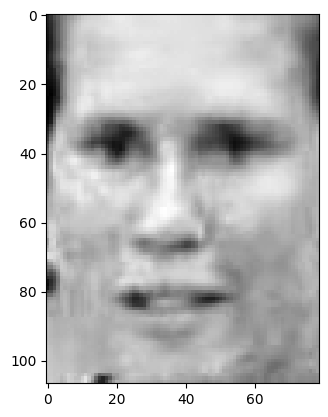

In [65]:
# we put example image from out

image = cv.imread('/content/gdrive/MyDrive/faces/Validation/male/063429.jpg.jpg')
image = cv.cvtColor(image , cv.COLOR_BGR2RGB)
image = cv.cvtColor(image , cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image , cmap="gray")

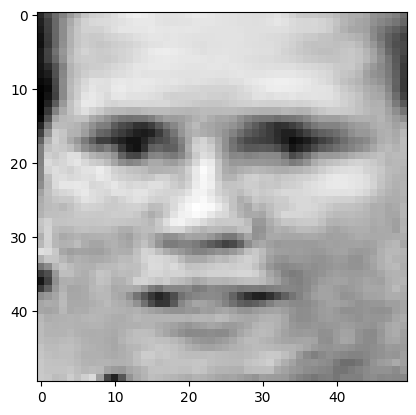

In [66]:
image = cv.resize(image , (50,50))
plt.figure()
plt.imshow(image , cmap="gray")

In [67]:
image_array = np.array(image)

threshold_value = threshold_otsu(image)
binary_image = image > threshold_value
image_array = binary_image.flatten()

image_array = image_array.reshape(1,-1)

In [68]:
prediction= model.predict(image_array)
if prediction ==0:
    print("Male")

if prediction ==1:
    print("Female")

Male


In [69]:
import pickle
with open('ML_Face_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)